##Research questions
Try to answer the below mentioned questions in our data analysis.
Anzrod15riskofdeath
ANZROD (2015 version) risk of death
Anzrod20riskofdeath
ANZROD (2020 version) risk of death

Evaluate the Calibration of these scores with reality
Between these two scores and actual outcomes
Mortality risk prediction models
Probability calibration in weather forecasting
Brier scores,
Probability prediction and forecasting,
Apache scores
All the times that u said there is 45% chances of rain, did it rain 45% of the time
Good estimates,  



*   Evaluate the efficiency of  Anzrod15riskofdeath, Anzrod20riskofdeath scores in predicting mortality.
*   If someone has a high risk score, how often does mortality actually happen?
*   How effective the Australian and New Zealand Risk of Death scoring system is in predicting mortality?


The degree of association between riskofdeath and mortality after taking into account other factors known to relate to these outcomes.

In [ ]:
#!unzip './ANZICS_APD_FY2018_FY2023.zip' -d './'

In [ ]:
#!rm -d "./ANZICS_APD_FY2018_FY2023.zip"

Conversation: 13.32
 if someone comes into hospital comes into ICU, and the discharge, outcome is death, so the patient dies in ICU, in that case, the ICU discharge, I see ICU outcome will be death. And after that hospital outcome should also be that nothing is not recorded,
 then it's just missing. It cannot, it cannot be otherwise.

 In terms of our own data training and validation, we do have that check if the patient has died in ICU, and that is the ICU discharge date and time available there is a variable that we have calculated so it's not the raw data. It's definitely died under ASCII ICU and died underscore hospital. So if the patient's ICU outcome is died, we just populate hospital outcome as died as well.

 there is yeah, there are bits that come as raw data and then there is a calculated ones that are possibly you know, useful analysis and might be put puts in terms of death. So if you look at died, underscore ICU and died underscore hospital, that would be either yes or no all Those who have died in ICU have always had that as died under hospital. And those who have died in hospital that not necessarily have death as an outcome in ICU. So one is a subset of the other. Okay,
 so can we talk about someone who's admitted to hospital as an episode in the ICU, is discharged from the ICU and later dies in hospital? How should that data? Or how should that information show up? And how can it show up? What sort of things can go wrong?

 So I feel I'll come for such a patient will be survived ICU and hospital outcome will be died in hospital?
How reliable is that hospital outcome given that it's happened outside the intensive care unit?
Yes. So, I would say for all the hospital discharge dates and times recorded, the outcome should be accurate.
Should be Yeah,

it is mostly accurate. I mean, there are, to my knowledge, there are no cases where the hospital outcome is died and that that patient has reappeared. Again, there might be small number of cases retrospectively in the very old data. But since 2017 2018, I think the data has been quite accurate. We also have a periodic NDI linkage national death index. Okay. So the data on that comes from the central death registry from ah W. Okay, and there is a possibility that we could verify all the deaths that have happened in hospital because every every test should ideally get loaded NDI. So
if I remember correctly, there is one variable towards the right hand side data, 177 variables, 177 columns. But it is to do with the debt yet the debt the registry? Yeah, the death date. My instinct is to say, that looks like something that's pretty reliable. Is that correct?
That is accurate. Again, that is based on only registry data that's not based on the NDI, because NDI data, we do the linkage once a year, and it's only for our internal reporting. So the ethics around use of that data is quite strict. So we cannot use that data for our likes of data can choose using for student projects, and it's such Yeah. However, we could verify each and every registry date of death with the NDI date of death. When it comes back to us, and check, whatever is recorded in registry is accurate or not.
So from what you've described, I'm imagining that if someone was to come to hospital, have an episode in the ICU, be discharged from the ICU, be discharged from the hospital and was then to die. There is no information about that person's death anywhere recorded in the in the ICU data.
Not in the ICU component of the registry data, but we do have hospital component,

but if they die outside the hospital, oh, yeah,
absolutely, then there is no way of recording that. If we do the MDR data linkage, we we will get that information. And we will update our data set. But yeah, it's we are using that data for some of our long term outcomes survivors. And yeah, that is our only way. But it's once a year, it's not timely. But from the registry point of view, yes. The death outside of hospital is not captured anywhere in the registry. This

From April 2015, ANZICS CORE implemented the Australian and New Zealand Risk of Death (ANZROD) model as the primary risk prediction model. This model is derived using components of the APACHE III-J score, with additional data elements added. It has been developed using Australian and New Zealand patient data from the APD. While Apache III-J has two prediction algorithms (CABG and non-CABG), ANZROD has eight different algorithms, based on the major diagnostic categories. ANZROD is a more accurate predictor of mortality and provides better adjustment for case-mix variation than APACHE III-J. In addition, ANZROD has less exclusions than APACHE III-J. All initial admissions to ICU aged 16 years and over (other than those specifically admitted for organ donation or palliative care) are included when an ANZROD SMR is calculated. ANZROD will be regularly recalibrated so that the SMR continues to sit around 1 in the years to come. ANZROD provides a single number for each patient which represents the individual’s risk of death before hospital discharge.

Age
Hospital Discharge Destination
ICU Admission Source
ICU admission following elective surgery
Planned ICU Admission
Treatment Goals for Admission
Total Glasgow Coma Score
Glasgow Coma Score Unavailable Due to Sedation
Eye Opening Component Glasgow Coma Score
Verbal Component Glasgow Coma Score
Motor Component Glasgow Coma Score
Core Temperature
Heart Rate
Respiratory Rate
Invasive Ventilation Status for Respiratory Rate (high)
Invasive Ventilation Status for Respiratory Rate (low)
Mean Arterial Blood Pressure
Sodium
Creatinine
Urea
Albumin
Bilirubin
Glucose
Urine Output for 24 Hours
Haematocrit
White Blood Cell Count
Fraction of Inspired Oxygen: APACHE III-J
Partial Pressure of Oxygen: APACHE III-J
Partial Pressure of Carbon Dioxide using Worst Oxygenation: APACHE III-J
pH: APACHE III-J
Intubation
Acute Renal Failure Status
Chronic Health Evaluation: APACHE II
Chronic Health Evaluation: APACHE III-J

ANZROD is a prediction model that was developed for use in ANZ ICUs to overcome the deficiencies of APACHE III-j. This model has been shown to be a better risk adjustment tool for benchmarking ICU outcomes in ANZ hospitals. However, as this model uses physiological data collected up to 24 hours after admission to provide estimates of predicted mortality,

We excluded readmission episodes to an ICU within the same hospital stay, patients admitted for palliative care and organ donation, and those with missing hospital outcomes.

The ANZROD model also excluded patients with a missing Acute Physiology score on ICU Day 1 in keeping with the methodology.


Information extracted for each patient included age, location before ICU admission, surgical status, admission diagnosis, presence of chronic illnesses and presence of treatment limitations. The outcome considered was ‘in-hospital mortality’.

In [ ]:
#!pip install utils

In [ ]:
#importing libraries required for this project

import numpy as np
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, label_binarize
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, log_loss, brier_score_loss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import calibration_curve

import scipy.stats as stats
from IPython.display import display, HTML
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
import pickle

In [ ]:
# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = 8, 4
# plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 10
# plt.rcParams['legend.fontsize'] = 10

In [ ]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

## Data Loading

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ANZICS_APD_FY2018_FY2023.csv')
# data.head()

In [ ]:
data = pd.read_csv('./ANZICS_APD_FY2018_FY2023.csv')
data.head()

/tmp/ipykernel_190/3999970978.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./ANZICS_APD_FY2018_FY2023.csv')


,HospitalClassification,PublicPrivate,PatientID,IcuAdmFinYr,IcuAdmYYYYMM,IcuAdmYear,IcuAdmMonth,IcuAdmDay,IcuAdmHour,IcuDisYear,...,INV_DAYONE,INV_HOURS,INV_IND,NIV_HOURS,NIV_IND,ECMO_IND,INOTROP_IND,RENAL_IND,TRACHE_IND,PREG_GESTWK
0,Tertiary,Public,3865,2018-19,201808,2018,8,27,2,2018.0,...,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,NaN
1,Metropolitan,Public,8348,2021-22,202112,2021,12,30,21,2022.0,...,2.0,0.0,2.0,7.0,1.0,2.0,2.0,2.0,2.0,NaN
2,Metropolitan,Public,8610,2022-23,202207,2022,7,1,22,2022.0,...,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,NaN
3,Rural / Regional,Public,14567,2020-21,202105,2021,5,6,15,2021.0,...,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN
4,Private,Private,22568,2022-23,202207,2022,7,19,11,2022.0,...,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN


In [ ]:
# Convert DataFrame to Parquet format and save it

#data.to_parquet('/content/gdrive/MyDrive/Colab Notebooks/ANZICS_APD_FY2018_FY2023.parquet')

In [ ]:
#IcuAdmYear
previous_shape = data.shape[0]

data = data[
    (data.IcuAdmYear.isin([2023,np.nan]))
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  1045856
New shape:  (97429, 193)


In [ ]:
print(data.shape)

(97429, 193)


In [ ]:
#df = pd.read_parquet('your_parquet_file.parquet')

There are 97429 records with 193 features in the dataset for the year 2023

## Exploratory Data Analysis

In [ ]:
print(data.isna().sum().sum())
print(data.isnull().sum().sum())

2511597
2511597


In [ ]:
print(data.isnull().sum().sum()/(data.size)*100)

13.356860851029184


In data set we have 14.28% total missing values

In [ ]:
data.duplicated().sum()

0

In [ ]:
#checking for missing values in columns in data, Not checking other columns as the data is case based only the
missing_data = data.isna().sum()
html_missing_data = create_scrollable_table(missing_data.to_frame(), 'missing_data', 'Missing data in the dataset')
display(HTML(html_missing_data))

,0
HospitalClassification,0
PublicPrivate,0
PatientID,0
IcuAdmFinYr,0
IcuAdmYYYYMM,0
IcuAdmYear,0
IcuAdmMonth,0
IcuAdmDay,0
IcuAdmHour,0
IcuDisYear,137


In [ ]:
#checking the datatype of different columns
datatypes = data.dtypes
html_datatypes = create_scrollable_table(datatypes.to_frame(), 'datatypes', 'Different data types in the dataset')
display(HTML(html_datatypes))

,0
HospitalClassification,category
PublicPrivate,category
PatientID,object
IcuAdmFinYr,object
IcuAdmYYYYMM,int64
IcuAdmYear,int64
IcuAdmMonth,int64
IcuAdmDay,int64
IcuAdmHour,int64
IcuDisYear,float64


In [ ]:
# Get the descriptive statistics for numerical columns
data.describe()

,IcuAdmYYYYMM,IcuAdmYear,IcuAdmMonth,IcuAdmDay,IcuAdmHour,IcuDisYear,IcuDisMonth,IcuDisDay,IcuDisHour,hosp_srce,...,INV_DAYONE,INV_HOURS,INV_IND,NIV_HOURS,NIV_IND,ECMO_IND,INOTROP_IND,RENAL_IND,TRACHE_IND,PREG_GESTWK
count,81884.000000,81884.0,81884.000000,81884.000000,81884.000000,81798.000000,81798.000000,81798.000000,81798.000000,81532.000000,...,81059.000000,43229.000000,76149.000000,40602.000000,75524.000000,75361.000000,76193.000000,75469.000000,75216.000000,518.000000
mean,202303.566509,2023.0,3.566509,15.774999,14.167933,2023.000012,3.672865,15.682841,13.840595,1.635444,...,1.697825,33.669689,1.669438,3.114034,1.907592,1.997014,1.603258,1.960818,1.988806,31.615830
std,1.693006,0.0,1.693006,8.730964,5.994715,0.003496,1.717193,8.756703,3.859696,1.842698,...,0.459204,102.163753,0.470419,15.783903,0.289603,0.054560,0.489225,0.194028,0.105211,10.154565
min,202301.000000,2023.0,1.000000,1.000000,0.000000,2023.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,202302.000000,2023.0,2.000000,8.000000,11.000000,2023.000000,2.000000,8.000000,12.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,28.250000
50%,202304.000000,2023.0,4.000000,16.000000,15.000000,2023.000000,4.000000,16.000000,14.000000,1.000000,...,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,36.000000
75%,202305.000000,2023.0,5.000000,23.000000,19.000000,2023.000000,5.000000,23.000000,16.000000,1.000000,...,2.000000,19.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,39.000000
max,202306.000000,2023.0,6.000000,31.000000,23.000000,2024.000000,12.000000,31.000000,23.000000,8.000000,...,2.000000,3759.000000,2.000000,475.000000,2.000000,2.000000,2.000000,2.000000,2.000000,42.000000


In [ ]:
data['HospitalClassification'].value_counts()

HospitalClassification
Tertiary            32887
Private             28117
Metropolitan        11326
Rural / Regional     9554
Name: count, dtype: int64

In [ ]:
data['HospitalClassification'] = data['HospitalClassification'].astype('category')

In [ ]:
data['HospitalClassification'].describe()

count        81884
unique           4
top       Tertiary
freq         32887
Name: HospitalClassification, dtype: object

In [ ]:
data['PublicPrivate'].value_counts()

PublicPrivate
Public                             52563
Private                            28117
Public under private management     1204
Name: count, dtype: int64

In [ ]:
data['PublicPrivate'] = data['PublicPrivate'].astype('category')

In [ ]:
data['sex'].value_counts()

sex
M    46315
F    35490
I       57
Name: count, dtype: int64

In [ ]:
data['hosp_srce'].value_counts()

hosp_srce
1.0    68657
8.0     5824
2.0     5150
4.0     1379
3.0      237
5.0      174
6.0       82
7.0       29
Name: count, dtype: int64

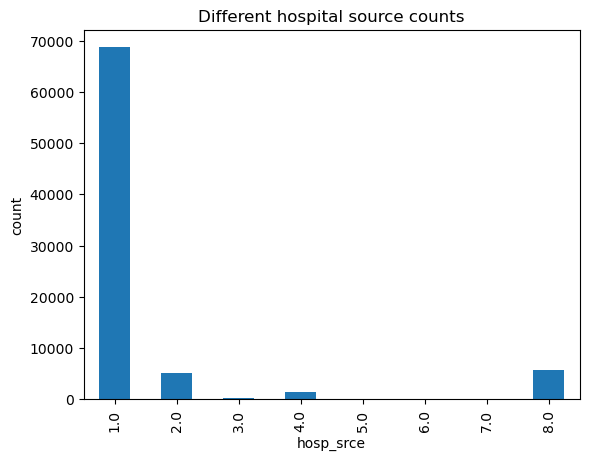

In [ ]:
# hospital admission source codes
# (1 Home, 2 Other Acute Hospital (not ICU/ED), 3 Nursing home/Chronic care/Palliative care,4 Other hospital - ICU, 5 Rehabilitation, 6 Mental health, 7 Inborn, 8 Other hospital – ED)
#plotting the activities in the dataset after slecting first 5 events as prefix
data['hosp_srce'].value_counts().sort_index().plot(kind='bar', rot='vertical', ylabel='count', title = 'Different hospital source counts')
plt.show()

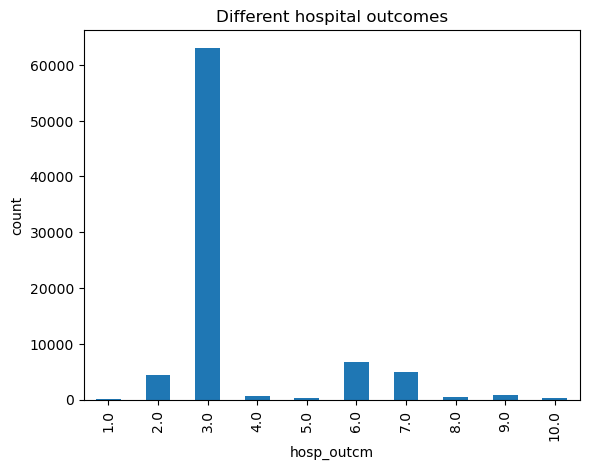

In [ ]:
# hospital outcome codes
# (2 Died, 3 Home, 4 Transferred to Nursing home/Chronic care/Palliative care, 5 Transferred to other hospital – ICU, 6 Transferred to other acute hospital,
#7 Transferred to Rehabilitation, 8 Transferred to Mental health, 9 Hospital in the home)
data['hosp_outcm'].value_counts().sort_index().plot(kind='bar', rot='vertical', ylabel='count', title = 'Different hospital outcomes')
plt.show()


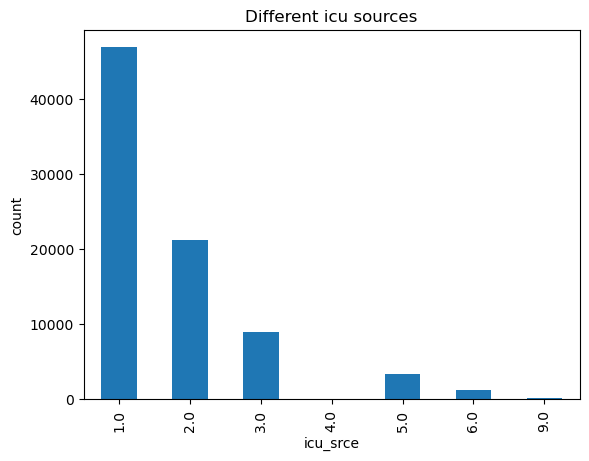

In [ ]:
# Source of ICU admission
# (1 OT/Recovery 2 Accident & Emergency 3 Ward 4 Other ICU, same hospital 5 Other hospital 6 Other Hospital ICU 9 Direct ICU admission (from home))
data['icu_srce'].value_counts().sort_index().plot(kind='bar', rot='vertical', ylabel='count', title = 'Different icu sources')
plt.show()

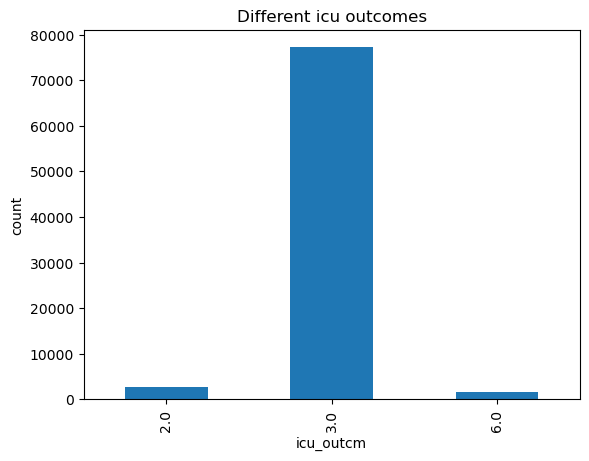

In [ ]:
# ICU outcome codes
# (2 Died in ICU 3 Survived ICU 5 Transferred to another ICU 6 Transferred to another hospital)
data['icu_outcm'].value_counts().sort_index().plot(kind='bar', rot='vertical', ylabel='count', title = 'Different icu outcomes')
plt.show()

In [ ]:
# Summary statistics for categorical features
categorical_features = data.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')
display(HTML(html_categorical ))

,count,unique,top,freq
PatientID,81884,47875,39947,14
IcuAdmFinYr,81884,1,2022-23,81884
sex,81862,3,M,46315
RegistryDateOfDeath,5257,5026,2023-05-14 21:30:00.000,4
DSLK581,81777,78106,IRPKW120319882,14


In [ ]:
data['anzrod15riskofdeath'].value_counts()


anzrod15riskofdeath
0.000000    97
0.002189    21
0.001913    15
0.003436    15
0.002768    15
            ..
0.014468     1
0.114782     1
0.617374     1
0.123204     1
0.517131     1
Name: count, Length: 46683, dtype: int64

In [ ]:
data['anzrod15riskofdeath'].min()

0.0

In [ ]:
data['anzrod15riskofdeath'].max()

0.999999

Text(0.5, 1.0, 'Histogram of anzrod15riskofdeath Values')

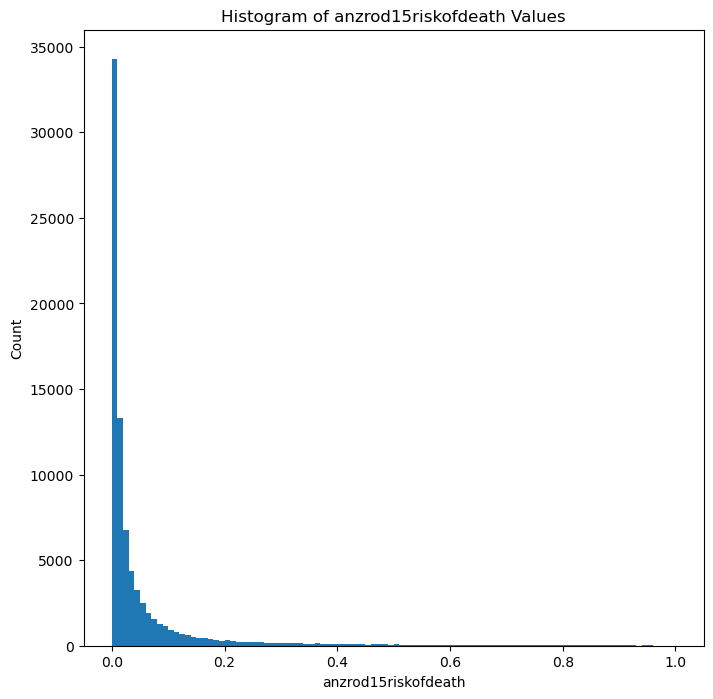

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.hist(data['anzrod15riskofdeath'], 100)
ax.set_xlabel('anzrod15riskofdeath')
ax.set_ylabel('Count')
ax.set_title('Histogram of anzrod15riskofdeath Values')


Text(0.5, 1.0, 'Histogram of anzrod20riskofdeath Values')

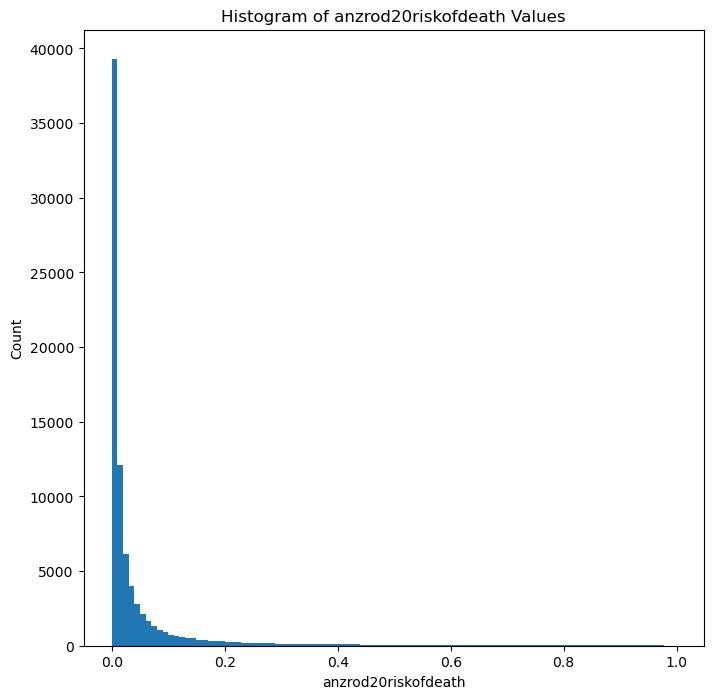

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.hist(data['anzrod20riskofdeath'], 100)
ax.set_xlabel('anzrod20riskofdeath')
ax.set_ylabel('Count')
ax.set_title('Histogram of anzrod20riskofdeath Values')

In [ ]:
data['anzrod20riskofdeath'].value_counts()

anzrod20riskofdeath
0.000000    718
0.000985     15
0.002585     15
0.001246     14
0.001918     13
           ... 
0.935584      1
0.209355      1
0.115533      1
0.631837      1
0.680174      1
Name: count, Length: 43451, dtype: int64

In [ ]:
data['anzrod20riskofdeath'].min()

0.0

In [ ]:
data['anzrod20riskofdeath'].max()

0.997937

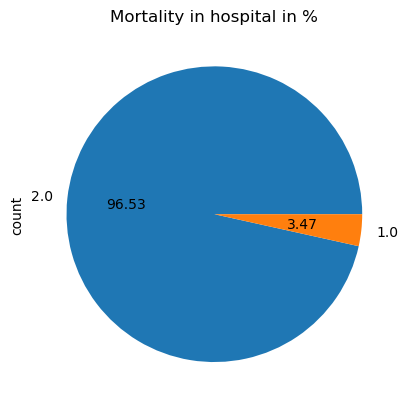

In [ ]:
_=data.died_icu.value_counts().plot(kind='pie',autopct="%.2f",title ='Mortality in hospital in %',color='blue')

In [ ]:
#(1=yes, 2=no)
data['died_icu'].value_counts()

died_icu
2.0    78937
1.0     2840
Name: count, dtype: int64

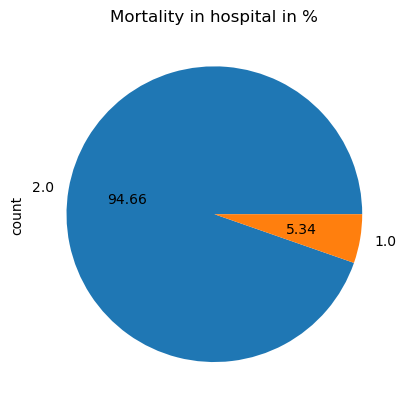

In [ ]:
_=data.died_hosp.value_counts().plot(kind='pie',autopct="%.2f",title ='Mortality in hospital in %')

In [ ]:
#(1=yes, 2=no)
data['died_hosp'].value_counts()

died_hosp
2.0    77511
1.0     4373
Name: count, dtype: int64

In [ ]:
data['age'].value_counts()

age
76    2215
69    2143
72    2129
75    2127
73    2073
      ... 
92     125
97     123
93     112
94      76
95       2
Name: count, Length: 81, dtype: int64

In [ ]:
#weight weight in Kg
data['weight'].describe()

count    56170.000000
mean        85.297292
std         25.291354
min          1.000000
25%         68.600000
50%         81.200000
75%         97.000000
max        347.000000
Name: weight, dtype: float64

In [ ]:
#height in cms
data['height'].describe()

count    49801.000000
mean       169.504106
std         11.872251
min         10.000000
25%        163.000000
50%        170.000000
75%        178.000000
max        272.000000
Name: height, dtype: float64

In [ ]:
# pregnancy status
# (1 Currently pregnant 2 Not pregnant 3 Postpartum period): preg_stat
data['preg_stat'].value_counts()

preg_stat
2.0    15417
3.0      697
1.0      193
Name: count, dtype: int64

In [ ]:
# Treatment goal in ICU admission
# (1 Full active management (without treatment limitation) 2 Treatment limitation order 3 Palliative care of a dying patient 4 Potential Organ donation)
data['treat_lmt'].value_counts()

treat_lmt
1.0    81857
Name: count, dtype: int64

In [ ]:
#cardarrest: cardiac arrest during 24 hours prior to ICU admission 1 = yes, 0 = no
data['cardarrest'].value_counts()

cardarrest
2.0    77991
1.0     2006
Name: count, dtype: int64

In [ ]:
#indigenous:Indigenous status codes, 1 = yes, 0 = no, -1 = unknown/missing
data['indigenous'].value_counts()

indigenous
2.0    74250
1.0     4147
Name: count, dtype: int64

In [ ]:
#arf:Acute Renal Failure 1 = yes, 2 = no
data['arf'].value_counts()

arf
2.0    75518
1.0     2602
Name: count, dtype: int64

In [ ]:
#intubated:Intubated at the time of worst blood gas collected 1 = yes, 0 = no
data['intubated'].value_counts()

intubated
2.0    49374
1.0    20875
Name: count, dtype: int64

In [ ]:
#ventilated: Invasively Ventilated during first 24 hours of ICU 1 = yes, 0 = no
data['ventilated'].value_counts()

ventilated
2.0    56555
1.0    25040
Name: count, dtype: int64

In [ ]:
#ap3diag ,Apache III diagnosis code (See list of ICU admission diagnoses)
data['ap3diag'].value_counts()

ap3diag
1207.0    5169
1902.0    4194
1408.0    4014
1504.0    3315
1405.0    3179
          ... 
1603.0      33
310.0       24
2101.0      10
1002.0       6
1201.0       1
Name: count, Length: 117, dtype: int64

In [ ]:
#apache3riskofdeath: Apache III risk of death
data['apache3riskofdeath'].value_counts()

apache3riskofdeath
0.005650    24
0.006069    22
0.007002    22
0.002242    21
0.004843    19
            ..
0.109200     1
0.659226     1
0.006491     1
0.032734     1
0.576198     1
Name: count, Length: 60521, dtype: int64

In [ ]:
data['apache3riskofdeath'].describe()

count    81716.000000
mean         0.106136
std          0.165728
min          0.000355
25%          0.014892
50%          0.039728
75%          0.113667
max          0.999945
Name: apache3riskofdeath, dtype: float64

In [ ]:
#apache3score: Apache III score
data['apache3score'].describe()

count    81845.000000
mean        48.780512
std         22.551873
min          0.000000
25%         33.000000
50%         45.000000
75%         60.000000
max        238.000000
Name: apache3score, dtype: float64

In [ ]:
#anzrodisincluded
#meets age and readmission-status requirements to be included in an ANZROD SMR (i.e. everyone who should be included if data was perfect) 1 = yes, 0 = no
data['anzrodisincluded'].value_counts()

anzrodisincluded
1    81845
2       39
Name: count, dtype: int64

In [ ]:
# COVID_pneumonitis_derived
# Indicator of COVID-19 Pneumonitis
# 1:# Primary COVID-19 Pneumonitis
# 8: # ANZICS Adult Patient Database (APD) - variable list
# 2:# Condition exacerbated by COVID-19
# 3: # Incidental COVID-19
# 0: # Other
data['COVID_pneumonitis_derived'].value_counts()

COVID_pneumonitis_derived
0    79890
2      964
3      577
1      453
Name: count, dtype: int64

In [ ]:
# apachegroup_derived
# Diagnosis grouping based on APACHE III Diagnosis code (ap3diag)
# 1:Cardiac surgery
# 2: Cardiac
# 3: Respiratory
# 4: Gastrointestinal
# 5: Neurological
# 6: Trauma
# 7: Sepsis
# 8: Other
data['apachegroup_derived'].value_counts()

apachegroup_derived
8    16897
4    12957
3    11388
2    11204
5    11183
1     8645
7     5955
6     3655
Name: count, dtype: int64

In [ ]:
#RegistryDateOfDeath: Death date based on the Registry data
data['RegistryDateOfDeath']

5                              NaN
26                             NaN
47                             NaN
56         2023-02-07 11:10:00.000
144                            NaN
                    ...           
1143240                        NaN
1143247                        NaN
1143267                        NaN
1143274                        NaN
1143284                        NaN
Name: RegistryDateOfDeath, Length: 81884, dtype: object

In [ ]:
#DSLK581: De-identified unique patient identifier across sites
data['DSLK581'].head(10)

5      XLNJA300719521
26     TKCKR210919592
47     BUKUL190919531
56     PUQXE060619821
144    VJGNV050619701
145    BUGKJ170819601
147    BUJGR080819951
148    JQGAW081019552
149    SRGKE260719932
151    VWPSM051119952
Name: DSLK581, dtype: object

In [ ]:

data['DPostCode'].head(10)

5     NaN
26    NaN
47    NaN
56    NaN
144   NaN
145   NaN
147   NaN
148   NaN
149   NaN
151   NaN
Name: DPostCode, dtype: float64

#### Checking for data inconsistency

check icu_outcm and died_icu
icu_outcm: 2 - died; 3 - survived
died_icu: 0 - survived; 1 - died

In [ ]:
#'died_icu' :(1=yes, 2=no)
# ICU outcome codes: 2 Died in ICU 3 Survived ICU 5 Transferred to another ICU 6 Transferred to another hospital
data['icu_outcm']

pd.crosstab(data['icu_outcm'], data['died_icu'])

died_icu,1.0,2.0
icu_outcm,,
2.0,2840,0
3.0,0,77198
6.0,0,1739


In [ ]:
# hospital outcome codes
# (2 Died, 3 Home, 4 Transferred to Nursing home/Chronic care/Palliative care, 5 Transferred to other hospital – ICU, 6 Transferred to other acute hospital, 7 Transferred to Rehabilitation, 8 Transferred to Mental health, 9 Hospital in the home)
#data['died_hosp'] : (1=yes, 2=no)
pd.crosstab(data['hosp_outcm'], data['died_hosp'])

died_hosp,1.0,2.0
hosp_outcm,,
1.0,0,30
2.0,4373,0
3.0,0,63112
4.0,0,722
5.0,0,252
6.0,0,6721
7.0,0,5033
8.0,0,506
9.0,0,893


In [ ]:
#check died_icu and died_hosp
pd.crosstab(data['died_icu'], data['died_hosp'])

died_hosp,1.0,2.0
died_icu,,
1.0,2840,0
2.0,1530,77407


### Data Cleaning

There is s ome inconsistency in data for the above 36 people who died in ICU but is marked as survived in hospital.

Remove the inconsistent rows of data

In [ ]:
previous_shape = data.shape[0]

data = data[
    ~((data.died_icu == 1) & (data.died_hosp == 2))
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  0
New shape:  (81884, 193)


In [ ]:
#Removing patients with age less than 16 years
previous_shape = data.shape[0]
data = data[
    ~(data.age < 16)
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  0
New shape:  (81884, 193)


In [ ]:
#remove patients admitted for palliative care
previous_shape = data.shape[0]
data = data[
    ~(data.treat_lmt == 3)
]
print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)


Rows removed:  0
New shape:  (81884, 193)


In [ ]:
#exclude patients with missing hospital outcomes.
data['hosp_outcm'].value_counts()


hosp_outcm
3.0     63112
6.0      6721
7.0      5033
2.0      4373
9.0       893
4.0       722
8.0       506
5.0       252
10.0      242
1.0        30
Name: count, dtype: int64

In [ ]:
print(data['hosp_outcm'].isna().sum())
print(data['hosp_outcm'].isnull().sum())
print((data['hosp_outcm'] == " ").sum())

0
0
0


In [ ]:
#exclude patients with missing hospital outcomes.
previous_shape = data.shape[0]
data.dropna(subset=['hosp_outcm'], inplace=True)
print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)


Rows removed:  0
New shape:  (81884, 193)


In [ ]:
#To avoid counting more than 1 hospital outcome for a patient during the same hospital stay,includ only each patient's first ICU admission.
#whether this admission is a readmission or not (1=yes, 2=no)
data['readmitted'].value_counts()

readmitted
2    81884
Name: count, dtype: int64

In [ ]:
previous_shape = data.shape[0]
data = data[
    ~(data.readmitted == 1)
]
print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)


Rows removed:  0
New shape:  (81884, 193)


In [ ]:
print(data['DSiteID'].value_counts())

DSiteID
318    1629
29     1407
229    1403
37     1399
105    1278
       ... 
257      82
209      66
785      65
553      64
633      35
Name: count, Length: 192, dtype: int64


In [ ]:
 data['DSLK581'].apply(lambda x: isinstance(x, str)).any()

True

There are text vlaues in DSLK581 column.

In [ ]:

print(data['apache3score'].isna().sum())
print(data['apache3score'].isnull().sum())
print((data['apache3score'] == " ").sum())

39
39
0


In [ ]:
print(data['icu_hrs'].value_counts())


icu_hrs
24.000000     309
21.000000     277
22.000000     262
20.000000     249
23.000000     247
             ... 
181.183333      1
269.166666      1
470.766666      1
121.800000      1
217.000000      1
Name: count, Length: 14520, dtype: int64


In [ ]:
print(data['icu_hrs']<= 24)

5          False
26         False
47         False
56         False
144        False
           ...  
1143240     True
1143247     True
1143267    False
1143274    False
1143284    False
Name: icu_hrs, Length: 81884, dtype: bool


In [ ]:
# Remove patients missing an acute physiology score on ICU day 1
previous_shape = data.shape[0]

data = data[
    ~((data['icu_hrs']<= 24) & (data['apache3score'].isna()))
]
print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)


Rows removed:  0
New shape:  (81884, 193)


In [ ]:
physio_vars = ['temperaturescore', 'meanarterialpressurescore', 'heartratescore', 'respiratoryratescore',
               'sodiumscore', 'creatininescore', 'haematocritscore', 'whitecellcountscore', 'oxygenationscore',
               'urineoutputscore', 'glucosescore', 'bilirubinscore', 'albuminscore', 'phscore', 'neurologicalscore']

Remove those raws were a physiological variable is missing on the first day.

In [ ]:
previous_shape = data.shape[0]
for i in physio_vars:
    data = data[
    ~((data['icu_hrs']<= 24) & (data[i].isna()))
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  0
New shape:  (81884, 193)


Drop patients who have a treatment limitation (since most cases have no treatment limitation, treats NA values as no limitation)

In [ ]:
previous_shape = data.shape[0]

data = data[
    (data.treat_lmt.isin([1,np.nan])) # no treatment limitation
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  0
New shape:  (81884, 193)


Drop patients whose ICU outcome is transferred to another ICU. Include NA values

In [ ]:
previous_shape = data.shape[0]

data = data[
    (data.icu_outcm.isin([2,3,6,np.nan])) # icu_outcm shows either died(2) or survived(3) or transferred hosp (6)
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  0
New shape:  (81884, 193)


Include only first-time admissions

#admepisode  
To obtain first admissions you can pull out everyone with AdmEpisode = 0 or 1  
0 first admission (patient had no subsequent readmissions)  
1 first admission (patient had at least 1 readmission)  
2 2nd admission during this hospital stay (i.e. 1st readmission)  
3 3rd admission during this hospital stay  
4 4th admission during this hospital stay  
5 5th admission during this hospital stay  

In [ ]:
previous_shape = data.shape[0]

data = data[
    (data.admepisode.isin([0,1,np.nan])) # Include first-time admissions only
]

print('Rows removed: ', (previous_shape - data.shape[0]))
print('New shape: ', data.shape)

Rows removed:  0
New shape:  (81884, 193)


## Select features of interest

Pick relavent features Some variables are obvious irrelavent. Fist pick a rough set of candidates based on two subsets: then to refine the list through EDA.  

1. Biological background info
2. Highest and lowest physiology in first 24 hours of ICU stay

### Response Variable

This model predicts the risk of death at the time of ICU admission, so anzrod20riskofdeath is the target variable, and remove hosp_outcm, icu_outcm and died_icu.

In [ ]:
target_var = ['died_hosp']

In [ ]:
bio_vars = ['chr_resp', 'chr_cvs', 'chr_liv', 'chr_ren', 'immundis',
                      'immunrx', 'aids', 'hepfail', 'lymphoma', 'metast', 'leukaem',
                       'DIABETES', 'weight', 'height', 'preg_stat',
                       'intubated']

In [ ]:
addtl_vars = ['anzrod20riskofdeath','apache3riskofdeath', 'anzrod15riskofdeath', 'apache3score','pre_icu_hrs','ELECT_SURG','agescore','treat_lmt','hosp_srce','icu_srce']

In [ ]:
final_data = data[bio_vars + physio_vars + addtl_vars + target_var]
final_data.shape

(81884, 42)

## Split into trainning and test set
Before doing any EDA on the data, it is best practice to split the data into trainning and test set, and only explore on the trainning set.  
But first check missing values in target variable died_hosp

In [ ]:
final_data.died_hosp.isnull().sum()

0

In [ ]:
final_data.died_hosp.isnull().sum() / final_data.shape[0] * 100

0.0

In [ ]:
previous_shape = final_data.shape[0]
final_data_clean = final_data.copy() # keep a copy of data_candidate

final_data = final_data.drop(columns = ['anzrod20riskofdeath','apache3riskofdeath', 'anzrod15riskofdeath', 'apache3score'])

scaler = MinMaxScaler(feature_range=(-1, 1))
final_data['weight'] = scaler.fit_transform(final_data['weight'].values.reshape(-1,1))
final_data['height'] = scaler.fit_transform(final_data['height'].values.reshape(-1,1))
final_data['pre_icu_hrs'] = scaler.fit_transform(final_data['pre_icu_hrs'].values.reshape(-1,1))

final_data = final_data.dropna(subset=['died_hosp'])

print('Rows removed: ', (previous_shape - final_data.shape[0]))
print('New shape: ', final_data.shape)

Rows removed:  0
New shape:  (81884, 38)


In [ ]:
def show_na_info(df, missing_only = False):
    rlt = pd.DataFrame({'count' : df.isnull().sum(),
              'percent' : df.isnull().sum() / df.shape[0] * 100})
    if missing_only:
        rlt = rlt[rlt['count'] > 0]
    return rlt[['count', 'percent']]

In [ ]:
missing_percent = show_na_info(final_data).sort_values('percent', ascending=False)
html_datatypes = create_scrollable_table(missing_percent, 'missing_percent', 'Missing values percentage in the dataset')
display(HTML(html_datatypes))

,count,percent
preg_stat,65577,80.085243
height,32083,39.181037
weight,25714,31.402960
intubated,11635,14.209125
DIABETES,6893,8.418006
hosp_srce,352,0.429876
ELECT_SURG,249,0.304089
immundis,195,0.238142
immunrx,195,0.238142
chr_liv,195,0.238142


In [ ]:
#filling missing values for CaseID column with 1:not pregnant
final_data['preg_stat'].fillna(1,inplace = True)
print(final_data['preg_stat'].isna().sum())

0


/tmp/ipykernel_190/3848200083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['preg_stat'].fillna(1,inplace = True)


In [ ]:
#intubated
#filling missing values for CaseID column with 2:not intubated
final_data['intubated'].fillna(2,inplace = True)
print(final_data['intubated'].isna().sum())

0


/tmp/ipykernel_190/2032627121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['intubated'].fillna(2,inplace = True)


In [ ]:
#hosp_srce:1-Home
final_data['hosp_srce'].fillna(1,inplace = True)
print(final_data['hosp_srce'].isna().sum())

0


/tmp/ipykernel_190/1181309175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['hosp_srce'].fillna(1,inplace = True)


In [ ]:
final_data['height'] = final_data['height'].fillna(final_data['height'].mean())

In [ ]:
final_data['weight'] = final_data['weight'].fillna(final_data['weight'].mean())
final_data['DIABETES'] = final_data['DIABETES'].fillna(final_data['DIABETES'].mean())

In [ ]:
#ELECT_SURG:2-No
final_data['ELECT_SURG'].fillna(2,inplace = True)
print(final_data['ELECT_SURG'].isna().sum())

0


/tmp/ipykernel_190/4003454066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['ELECT_SURG'].fillna(2,inplace = True)


In [ ]:
#chr_liv:2-No
final_data['chr_liv'].fillna(2,inplace = True)
print(final_data['chr_liv'].isna().sum())

0


/tmp/ipykernel_190/1847614705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['chr_liv'].fillna(2,inplace = True)


In [ ]:
#immunrx
final_data['immunrx'].fillna(2,inplace = True)
print(final_data['immunrx'].isna().sum())

0


/tmp/ipykernel_190/1138909622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['immunrx'].fillna(2,inplace = True)


In [ ]:
#immundis
final_data['immundis'].fillna(2,inplace = True)
print(final_data['immundis'].isna().sum())

0


/tmp/ipykernel_190/3293369077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['immundis'].fillna(2,inplace = True)


In [ ]:
#chr_ren
final_data['chr_ren'].fillna(2,inplace = True)
print(final_data['chr_ren'].isna().sum())

0


/tmp/ipykernel_190/1964413022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['chr_ren'].fillna(2,inplace = True)


In [ ]:
#chr_resp
final_data['chr_resp'].fillna(2,inplace = True)
print(final_data['chr_resp'].isna().sum())

0


/tmp/ipykernel_190/2578419842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['chr_resp'].fillna(2,inplace = True)


In [ ]:
#chr_cvs
final_data['chr_cvs'].fillna(2,inplace = True)
print(final_data['chr_cvs'].isna().sum())

0


/tmp/ipykernel_190/2548556268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['chr_cvs'].fillna(2,inplace = True)


In [ ]:
#aids
final_data['aids'].fillna(2,inplace = True)
print(final_data['aids'].isna().sum())

0


/tmp/ipykernel_190/2497594902.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['aids'].fillna(2,inplace = True)


In [ ]:
#metast
final_data['metast'].fillna(2,inplace = True)
print(final_data['metast'].isna().sum())

0


/tmp/ipykernel_190/356627447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['metast'].fillna(2,inplace = True)


In [ ]:
#lymphoma
final_data['lymphoma'].fillna(2,inplace = True)
print(final_data['lymphoma'].isna().sum())

0


/tmp/ipykernel_190/389154148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['lymphoma'].fillna(2,inplace = True)


In [ ]:
#hepfail
final_data['hepfail'].fillna(2,inplace = True)
print(final_data['hepfail'].isna().sum())

0


/tmp/ipykernel_190/2512455066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['hepfail'].fillna(2,inplace = True)


In [ ]:
#leukaem
final_data['leukaem'].fillna(2,inplace = True)
print(final_data['leukaem'].isna().sum())

0


/tmp/ipykernel_190/2322104996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['leukaem'].fillna(2,inplace = True)


In [ ]:
#pre_icu_hrs
final_data['pre_icu_hrs'].fillna(0,inplace = True)
print(final_data['pre_icu_hrs'].isna().sum())

0


/tmp/ipykernel_190/1346018129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['pre_icu_hrs'].fillna(0,inplace = True)


In [ ]:
#treat_lmt
final_data['treat_lmt'].fillna(1,inplace = True)
print(final_data['treat_lmt'].isna().sum())

0


/tmp/ipykernel_190/1585731119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['treat_lmt'].fillna(1,inplace = True)


In [ ]:
#icu_srce
final_data['icu_srce'].fillna(3,inplace = True)
print(final_data['icu_srce'].isna().sum())

0


/tmp/ipykernel_190/2477050930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['icu_srce'].fillna(3,inplace = True)


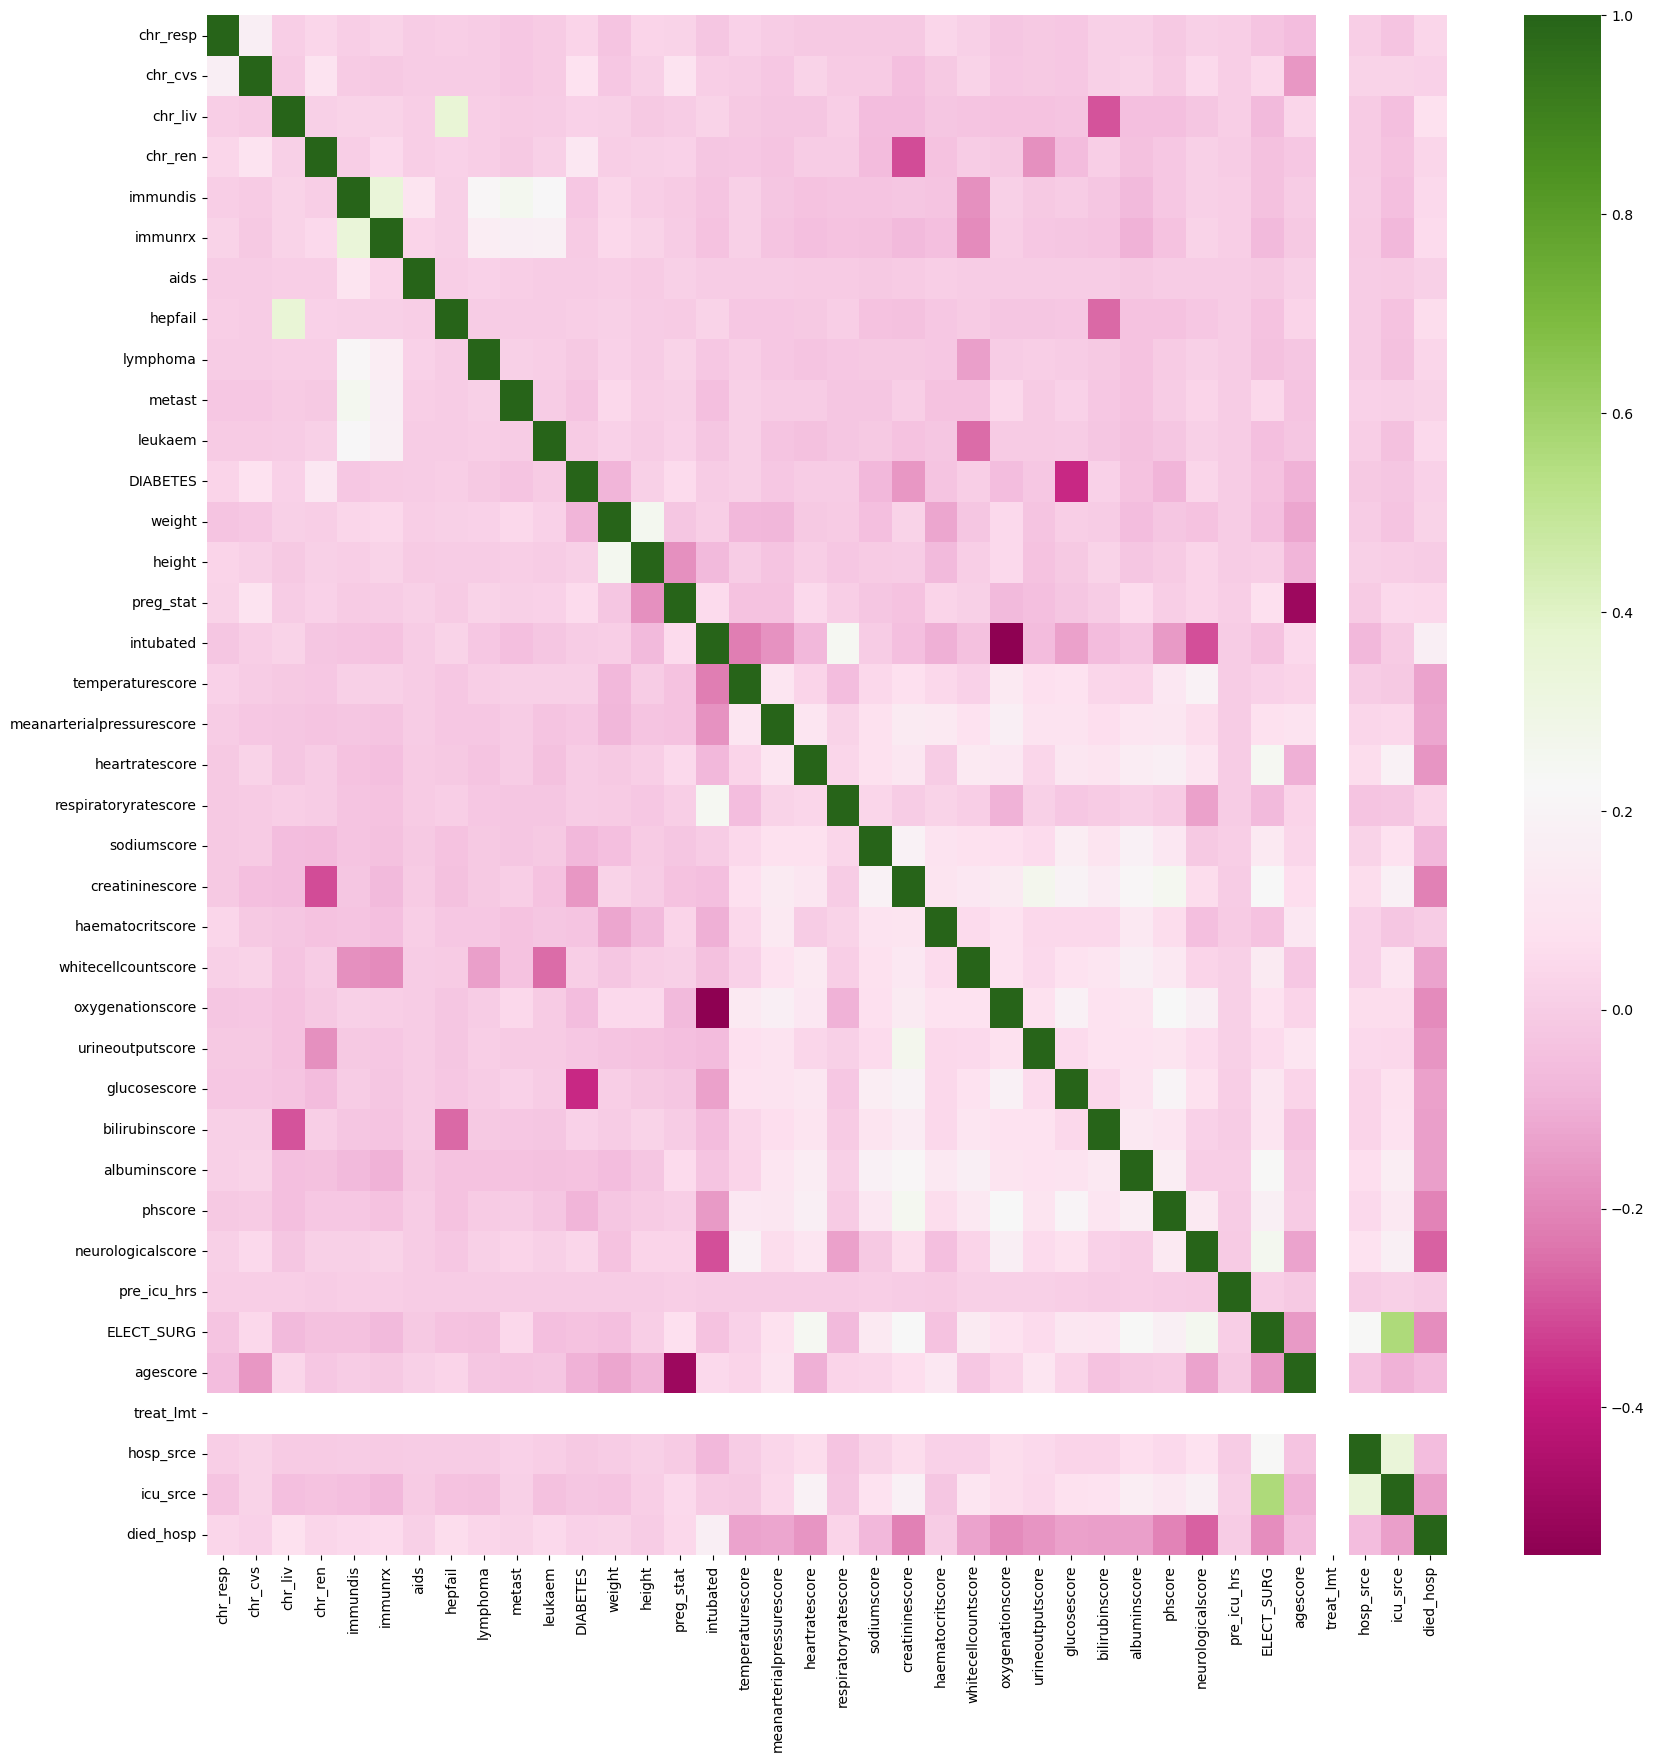

In [ ]:
plt.figure(figsize=(20,20))
_=sns.heatmap(final_data.corr(),cmap='PiYG')

In [ ]:
#selecting the features for prediction in X_feat set and target variable as y_feat
X_feat= final_data.drop(['died_hosp'],axis=1)
y_feat = final_data['died_hosp']

In [ ]:
print(X_feat.shape)
print(y_feat.shape)

(81884, 37)
(81884,)


In [ ]:
print(y_feat.head(5))

5      2.0
26     2.0
47     2.0
56     1.0
144    2.0
Name: died_hosp, dtype: float64


### Feature selection

Now split the data into training and test set(60-40 split)

In [ ]:
# Step 1: Split the data into train (60%) and a temporary set 'tst_val'(40%) initially
X_train, X_tst_val, y_train, y_tst_val = train_test_split(X_feat, y_feat, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into test (50%) and validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_tst_val, y_tst_val, test_size=0.5, random_state=42)

print(X_train.shape)#size of training dataset for independent features
print(y_train.shape)#size of training dataset for target feature
print(X_test.shape)#test feature set
print(y_test.shape)#test target variable
print(X_val.shape)#validation feature set
print(y_val.shape)#validation target variable

(49130, 37)
(49130,)
(16377, 37)
(16377,)
(16377, 37)
(16377,)


### Exploratory data Analysis on training data set

Check for missing values and their percentage

iddm, and preg_stat have too many missing values(all over 65%.). let's explore the distribution before removing the variables.


In [ ]:
# data_na_heavy = data_train[['preg_stat', 'anzrod20riskofdeath']]
# data_na_heavy.describe()

In [ ]:
# datatypes = data_train.dtypes
# html_datatypes = create_scrollable_table(datatypes.to_frame(), 'datatypes', 'Different data types in the dataset')
# display(HTML(html_datatypes))

In [ ]:
# plt.scatter(data_na_heavy['anzrod20riskofdeath'],data_na_heavy['iddm'])
# plt.title('Relationship between iddm and anzrod20riskofdeath')
# plt.xlabel('iddm')
# plt.ylabel('anzrod20riskofdeath')
# plt.show()


In [ ]:
#categorical_vars = ['sex', 'HospitalClassification']

In [ ]:
#data_train[categorical_vars].describe(include='all')

In [ ]:
#final_data_clean
# now to drop all NAs in died_hosp, score column
score_data = final_data_clean
score_data = score_data.dropna(subset=['died_hosp'])
score_data = score_data.dropna(subset=['anzrod20riskofdeath'])
score_data = score_data.dropna(subset=['anzrod15riskofdeath'])
score_data = score_data.dropna(subset=['apache3score'])
score_data.shape

(81845, 42)

#### Review Scoring Rows

In [ ]:
def plot_class_broke_down_hist(df, var, xlog=False, ylog=False, **histkwargs):
    df[var][df.died_hosp == 2].hist(alpha=.5, label='survived', color = "green", **histkwargs)
    df[var][df.died_hosp == 1].hist(alpha=.5, label='died', color = "red", **histkwargs)
    plt.xlabel(var)
    if xlog:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend();

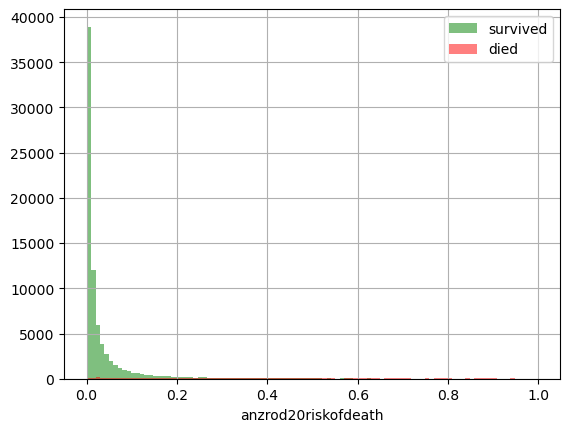

In [ ]:
plot_class_broke_down_hist(score_data, 'anzrod20riskofdeath', bins=100)

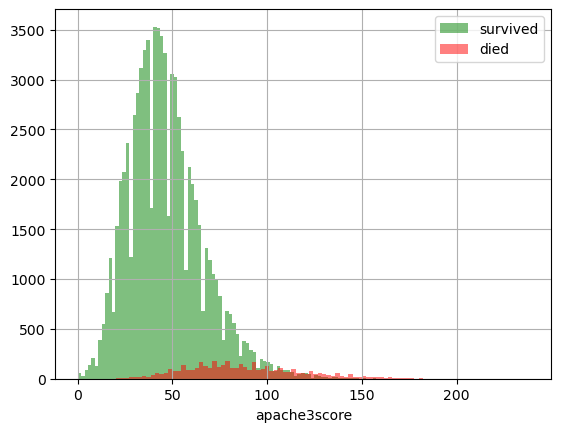

In [ ]:
plot_class_broke_down_hist(score_data, 'apache3score', bins=100)

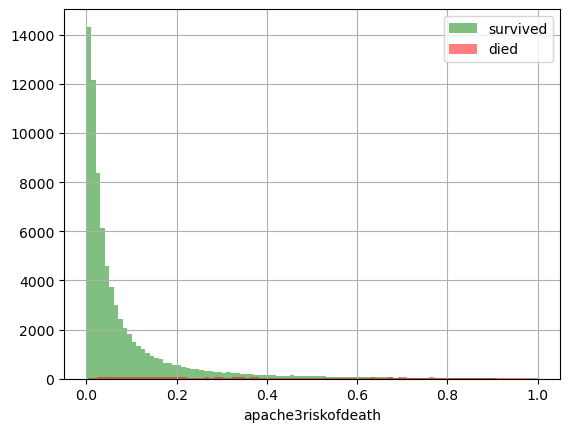

In [ ]:
plot_class_broke_down_hist(score_data, 'apache3riskofdeath', bins=100)

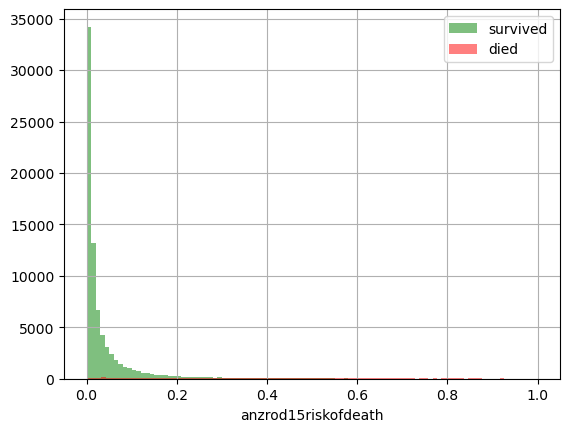

In [ ]:
plot_class_broke_down_hist(score_data, 'anzrod15riskofdeath', bins=100)

In [ ]:

import numpy as np
from sklearn import metrics
# y = np.array([1, 1, 2, 2])
# pred = np.array([0.1, 0.4, 0.35, 0.8])

actual = score_data.died_hosp
predict = score_data.anzrod20riskofdeath

model = dict()
actual = dict()
predict = dict()
color = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 2

model[0] = 'anzrod20riskofdeath'
actual[0] = score_data.died_hosp
predict[0] = score_data.anzrod20riskofdeath
color[0] = 'blue'

model[1] = 'anzrod15riskofdeath'
actual[1] = score_data.died_hosp
predict[1] = score_data.anzrod15riskofdeath
color[1] = 'orange'



for i in range(n_classes):
    fpr[i], tpr[i], thresholds = metrics.roc_curve(actual[i], predict[i], pos_label=1)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

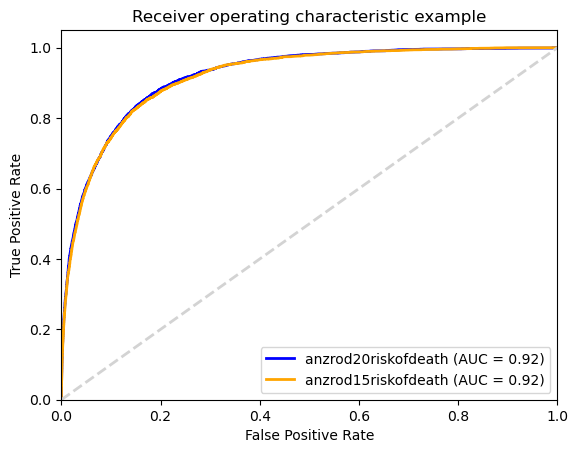

In [ ]:
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=color[i],
         lw=lw, label=model[i]+' (AUC = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='lightgrey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49130 entries, 1887 to 219449
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   chr_resp                   49130 non-null  float64
 1   chr_cvs                    49130 non-null  float64
 2   chr_liv                    49130 non-null  float64
 3   chr_ren                    49130 non-null  float64
 4   immundis                   49130 non-null  float64
 5   immunrx                    49130 non-null  float64
 6   aids                       49130 non-null  float64
 7   hepfail                    49130 non-null  float64
 8   lymphoma                   49130 non-null  float64
 9   metast                     49130 non-null  float64
 10  leukaem                    49130 non-null  float64
 11  DIABETES                   49130 non-null  float64
 12  weight                     49130 non-null  float64
 13  height                     49130 non-null  floa

### Logistic regression model implementation

In [ ]:
#Create a stratified k-fold object for cross-validation to balance the ratio of the target variable in all folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate your classifier with class weights
LR_classifier = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)

#Perform cross-validation using stratified folds
cv_scores = cross_val_score(LR_classifier, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print('***************Logistic regression model efficiency scores************')
#print("Cross-validation scores for training set: ", cv_scores)
print("\nMean accuracy for training set: ", np.mean(cv_scores))

#Train your model on the entire training set
LR_classifier.fit(X_train, y_train)
#Make predictions on the test set
# Evaluate the classifier without calibration
y_pred = LR_classifier.predict(X_test)

# Probability estimate
prob_pos = LR_classifier.predict_proba(X_test)[:, 1]

print("Accuracy without calibration:", accuracy_score(y_test, y_pred))
print("Log loss without calibration:", log_loss(y_test, prob_pos))

***************Logistic regression model efficiency scores************

Mean accuracy for training set:  0.8198046000407082
Accuracy without calibration: 0.8123587958722599
Log loss without calibration: 0.4232899357656333


In [ ]:
# Evaluate Brier score
brier_base = brier_score_loss(y_test, prob_pos)
print(f"Brier score of the base model: {brier_base:.4f}")

Brier score of the base model: 0.1330


In [ ]:
# True and Predicted Probabilities
true_pos, pred_pos = calibration_curve(y_test, prob_pos, pos_label=1, n_bins=10)

In [ ]:
#Plot the Probabilities Calibrated curve
plt.plot(pred_pos,
         true_pos,
         marker='o',
         linewidth=1,
         label='Logistic Regression')

#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         label='Perfectly Calibrated')

# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')

# Add a legend to the plot
plt.legend(loc='best')

# Show the plot
plt.show()

### Reliability diagram  
A reliability diagram is used to illustrate how the model performs in predicting the probability.

In [ ]:
# Calibrate the classifier using isotonic regression
calibrated_lr = CalibratedClassifierCV( LR_classifier, method='isotonic', cv=5)
calibrated_lr.fit(X_train, y_train)


# Evaluate the calibrated classifier
y_pred_calibrated = calibrated_lr.predict(X_test)
y_pred_proba_calibrated = calibrated_lr.predict_proba(X_test)[:, 1]
print("Accuracy with calibration:", accuracy_score(y_test, y_pred_calibrated))
print("Log loss with calibration:", log_loss(y_test, y_pred_proba_calibrated))

### calibration curve

In [ ]:
# Compute the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_calibrated, pos_label=1, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.plot(prob_pred, prob_true, marker='.', label='Isotonic regression')
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.legend()
plt.title('Reliability Diagram')
plt.show()

calibrate, the probability estimates.
One is to feed the probability estimates from, say, a random forest to a logistic regression model and train it with the original targets.
This works, because logistic regression is a rare beast that actually produces calibrated probabilities. The secret behind it is that it optimizes
 for log-odds, which makes probabilities actually present in the model’s cost function. This approach is known as Platt-scaling.

Now, Let’s evaluate the quality of the calibration by Brier score.

In [ ]:
# Evaluate Brier score
brier_isotonic = brier_score_loss(y_test, y_pred_proba_calibrated)
print(f"Brier score after Isotonic Regression: {brier_isotonic:.4f}")
